In [37]:
%load_ext autoreload
%autoreload 2

In [149]:
!nvcc fft.cu -gencode arch=compute_75,code=sm_75

In [150]:
!./a.out

In [ ]:
!cuda-memcheck a.out

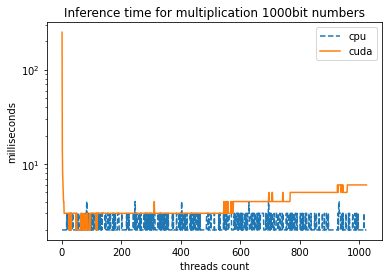

In [147]:
import numpy as np
import matplotlib.pylab as plt


with open('out_threads.txt', 'r') as f:
  lines = np.array([[int(j) for j in i.strip().split()] for i in f.readlines()])

threads = lines[:, 0]
cuda = lines[:, 1]
cpu = lines[:, 2]

plt.plot(threads, cpu, label='cpu', linestyle='dashed')
plt.plot(threads, cuda, label='cuda')
plt.yscale('log')
plt.xlabel('threads count')
plt.ylabel('milliseconds')
plt.title('Inference time for multiplication 1000bit numbers')
plt.legend()
plt.show()

In [148]:
threads[np.argmin(cuda)]

25

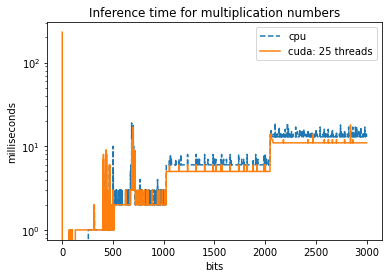

In [151]:
with open('out_N.txt', 'r') as f:
  lines = np.array([[int(j) for j in i.strip().split()] for i in f.readlines()])

N = lines[:, 0]
cuda = lines[:, 1]
cpu = lines[:, 2]

plt.plot(N, cpu, label='cpu', linestyle='dashed')
plt.plot(N, cuda, label='cuda: 25 threads')
plt.yscale('log')
plt.xlabel('bits')
plt.ylabel('milliseconds')
plt.title('Inference time for multiplication numbers')
plt.legend()
plt.show()